In [6]:
#Data
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
df= pd.read_csv("C:\\Users\\gnane\\Downloads\\Skydata_pro\\Skydata_pro.csv")
df.head()


,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237658e+18,122.472536,29.477546,18.80104,18.79409,19.17904,19.46893,19.62121,2830.0,301.0,1.0,82.0,5.011614e+18,STAR,0.000113,4451.0,55537.0,848.0
1,1.237661e+18,157.220491,38.044462,19.21634,17.36450,16.39222,15.96160,15.62490,3647.0,301.0,1.0,123.0,1.607801e+18,GALAXY,0.107083,1428.0,52998.0,56.0
2,1.237665e+18,128.426499,22.244187,17.58285,16.66683,16.37511,16.23573,16.03283,4517.0,301.0,2.0,113.0,2.171901e+18,GALAXY,0.024777,1929.0,53349.0,144.0
3,1.237655e+18,148.311910,3.603649,19.49339,18.02611,17.21924,16.73868,16.43414,2125.0,301.0,3.0,197.0,6.429279e+17,GALAXY,0.091564,571.0,52286.0,142.0
4,1.237649e+18,188.615906,0.966501,19.11787,18.80892,18.65386,18.43037,18.44886,752.0,301.0,6.0,301.0,3.266113e+17,QSO,1.528742,290.0,51941.0,365.0


In [7]:
df.iloc[99537].to_dict()

{'objid': 1.23765536929153e+18,
 'ra': 201.4882319868,
 'dec': 60.9673629642,
 'u': 18.65062,
 'g': 18.54073,
 'r': 18.38786,
 'i': 18.44258,
 'z': 18.35214,
 'run': 2304.0,
 'rerun': 301.0,
 'camcol': 2.0,
 'field': 250.0,
 'specobjid': 8.8272315819127e+17,
 'class': 'QSO',
 'redshift': 1.0754620000000001,
 'plate': 784.0,
 'mjd': 52327.0,
 'fiberid': 64.0}

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 18 columns):
objid        104529 non-null float64
ra           104497 non-null float64
dec          104486 non-null float64
u            104547 non-null float64
g            104502 non-null float64
r            104464 non-null float64
i            104494 non-null float64
z            104482 non-null float64
run          104492 non-null float64
rerun        104461 non-null float64
camcol       104504 non-null float64
field        104524 non-null float64
specobjid    104502 non-null float64
class        105000 non-null object
redshift     104483 non-null float64
plate        104490 non-null float64
mjd          104497 non-null float64
fiberid      104483 non-null float64
dtypes: float64(17), object(1)
memory usage: 14.4+ MB


In [9]:
df.shape
df.isnull().sum()
df.dtypes
df.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [10]:
#dataframe contains null values
#Replacing all null values with their respective column mean
def drop_null(df):
    for i in ['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'redshift', 'plate', 'mjd', 'fiberid']:
        df[i] = df[i].fillna(round(df[i].dropna().astype('float64').mean(),2))
    return df
df=drop_null(df)


In [11]:
df.isnull().sum()


objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [135]:
#Data descripition
df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.050000e+05,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,105000.0,105000.000000,105000.000000,1.050000e+05,105000.000000,105000.000000,105000.000000,105000.000000
mean,1.237663e+18,177.363611,25.077033,18.646141,17.446478,16.933405,16.682452,16.527239,3987.288841,301.0,3.274333,187.085827,2.968232e+18,0.202448,2636.854538,53943.284884,343.309631
std,7.280802e+12,78.135921,20.499198,0.826905,1.000871,1.155494,1.233747,1.305519,1694.552731,0.0,1.617128,140.564645,2.546272e+18,0.482905,2262.954451,1571.300836,217.924144
min,1.237646e+18,0.013061,-19.495456,10.611810,9.668339,9.005167,8.848403,8.947795,109.000000,301.0,1.000000,11.000000,2.994897e+17,-0.004136,266.000000,51608.000000,1.000000
25%,1.237658e+18,136.500300,6.868586,18.231147,16.880595,16.224270,15.893577,15.652465,2830.000000,301.0,2.000000,86.000000,1.342144e+18,0.000009,1192.000000,52736.000000,161.000000
50%,1.237662e+18,179.876922,24.112833,18.877405,17.538345,16.930000,16.653370,16.486365,3905.000000,301.0,3.000000,153.000000,2.376258e+18,0.049060,2111.000000,53740.000000,330.000000
75%,1.237667e+18,224.185749,40.286783,19.276880,18.096740,17.644092,17.412733,17.314640,5061.000000,301.0,5.000000,249.000000,3.308051e+18,0.103042,2938.000000,54612.000000,504.000000
max,1.237681e+18,359.999615,84.490494,19.599950,19.996050,31.990100,32.141470,29.383740,8162.000000,301.0,6.000000,982.000000,1.317645e+19,7.011245,11703.000000,58543.000000,1000.000000


In [136]:
df['rerun'].unique()

array([301.])

In [137]:
#Histogram plots


In [138]:
#less unique values
data=df.drop(['rerun'], axis = 1)

In [139]:
data.nunique()
data.head()

,objid,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237658e+18,122.472536,29.477546,18.80104,18.79409,19.17904,19.46893,19.62121,2830.0,1.0,82.0,5.011614e+18,STAR,0.000113,4451.0,55537.0,848.0
1,1.237661e+18,157.220491,38.044462,19.21634,17.36450,16.39222,15.96160,15.62490,3647.0,1.0,123.0,1.607801e+18,GALAXY,0.107083,1428.0,52998.0,56.0
2,1.237665e+18,128.426499,22.244187,17.58285,16.66683,16.37511,16.23573,16.03283,4517.0,2.0,113.0,2.171901e+18,GALAXY,0.024777,1929.0,53349.0,144.0
3,1.237655e+18,148.311910,3.603649,19.49339,18.02611,17.21924,16.73868,16.43414,2125.0,3.0,197.0,6.429279e+17,GALAXY,0.091564,571.0,52286.0,142.0
4,1.237649e+18,188.615906,0.966501,19.11787,18.80892,18.65386,18.43037,18.44886,752.0,6.0,301.0,3.266113e+17,QSO,1.528742,290.0,51941.0,365.0


In [140]:

data.shape

(105000, 17)

In [141]:
from numpy import unique

data_clean = data.values.astype(str)
# summarize the number of unique values in each column
for i in range(data_clean.shape[1]):
    num = len(unique(data_clean[:, i]))
    percentage = float(num) / data_clean.shape[0] * 100
    print(percentage)

64.71619047619048
95.23714285714286
95.23714285714286
76.03904761904762
81.8047619047619
83.78095238095239
84.40380952380953
85.19142857142857
0.49238095238095236
0.006666666666666667
0.800952380952381
95.23904761904762
0.002857142857142857
94.5704761904762
5.826666666666667
2.064761904761905
0.9533333333333333


In [142]:
#remove duplicated rows
def duplicated_remove(df):
    dups = df.duplicated()
    df.drop_duplicates(inplace=True)
    # We have to reset indexes because our dataframe still having previous indexes after dropping rows
    df=df.reset_index(drop=True)
    return df
data=duplicated_remove(data)
data.head()

,objid,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237658e+18,122.472536,29.477546,18.80104,18.79409,19.17904,19.46893,19.62121,2830.0,1.0,82.0,5.011614e+18,STAR,0.000113,4451.0,55537.0,848.0
1,1.237661e+18,157.220491,38.044462,19.21634,17.36450,16.39222,15.96160,15.62490,3647.0,1.0,123.0,1.607801e+18,GALAXY,0.107083,1428.0,52998.0,56.0
2,1.237665e+18,128.426499,22.244187,17.58285,16.66683,16.37511,16.23573,16.03283,4517.0,2.0,113.0,2.171901e+18,GALAXY,0.024777,1929.0,53349.0,144.0
3,1.237655e+18,148.311910,3.603649,19.49339,18.02611,17.21924,16.73868,16.43414,2125.0,3.0,197.0,6.429279e+17,GALAXY,0.091564,571.0,52286.0,142.0
4,1.237649e+18,188.615906,0.966501,19.11787,18.80892,18.65386,18.43037,18.44886,752.0,6.0,301.0,3.266113e+17,QSO,1.528742,290.0,51941.0,365.0


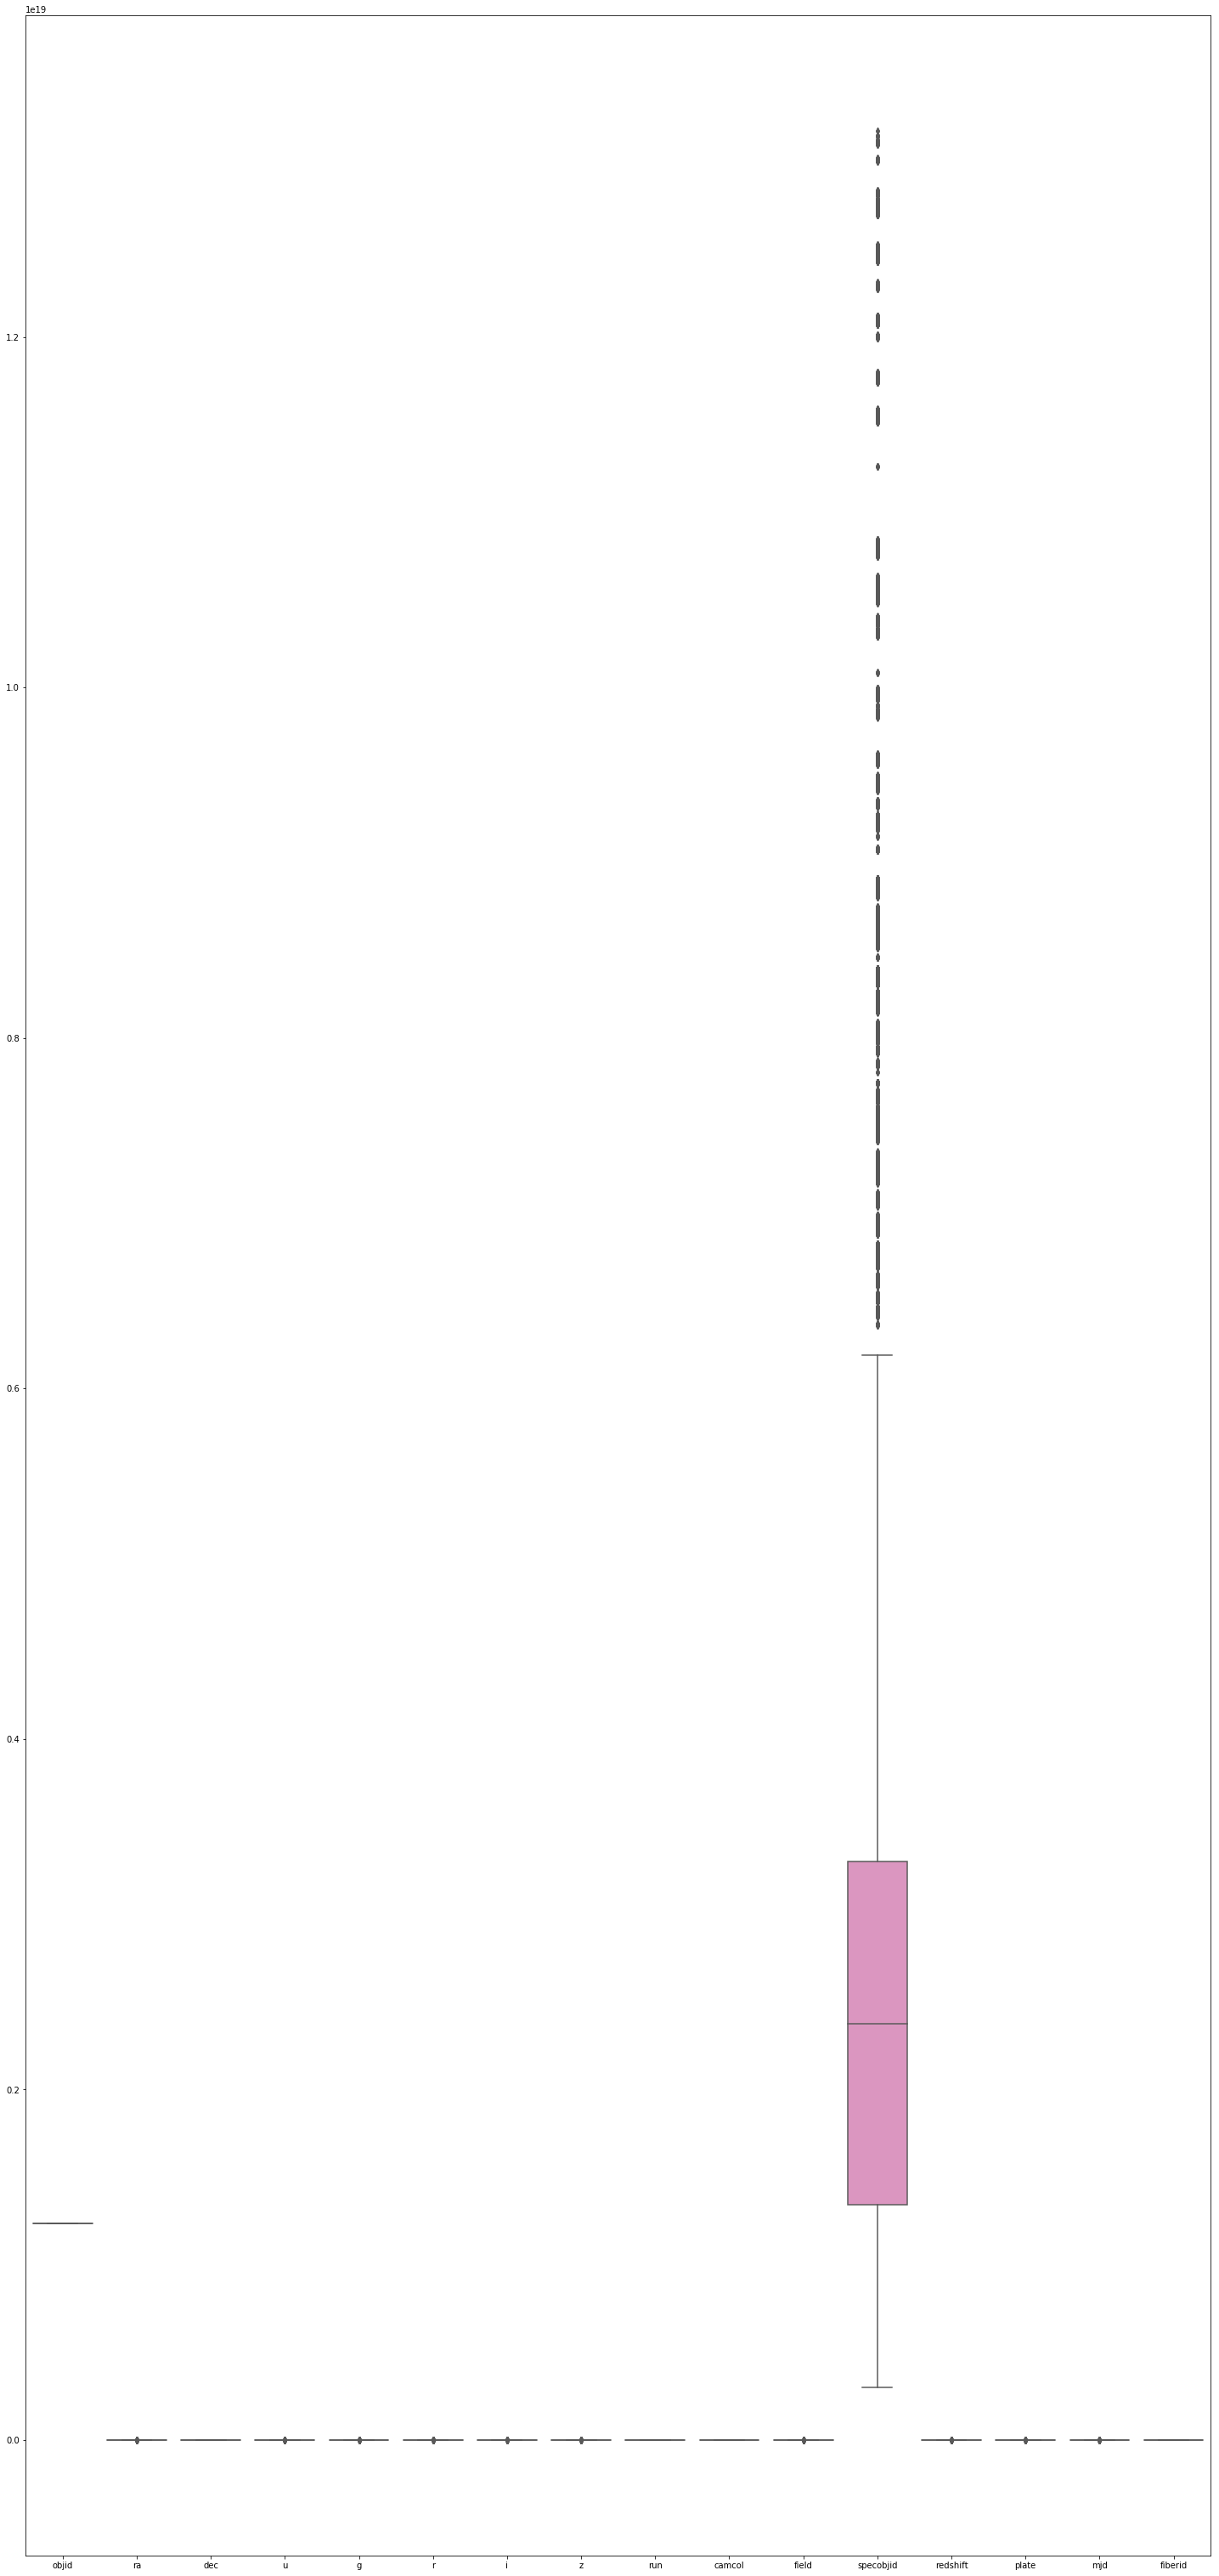

In [143]:
#Checking for outliers'
fig, ax = plt.subplots(figsize=(25, 55))
sns.boxplot(data=data, orient="v", palette="Set2",ax=ax );

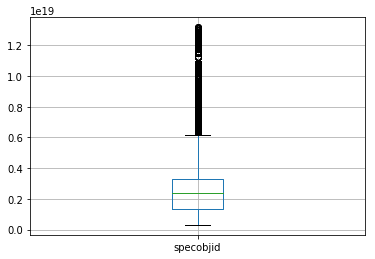

In [144]:
data.boxplot(column=['specobjid']);

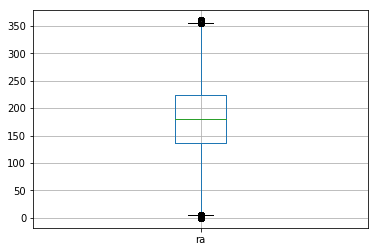

In [145]:
data.boxplot(column=['ra']);

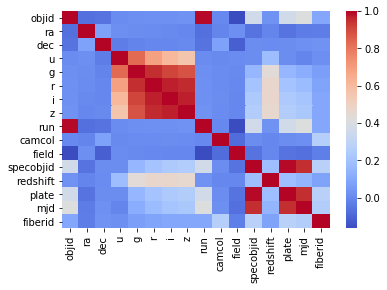

In [146]:
sns.heatmap(data.corr(),cmap='coolwarm')

In [147]:
# Didn't find much outliers


GALAXY    51323
STAR      39066
QSO       13697
Name: class, dtype: int64


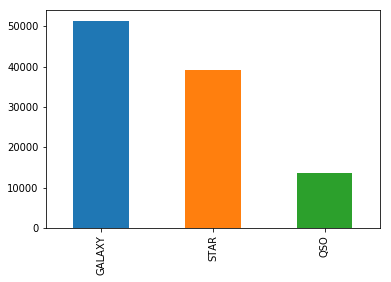

In [148]:
#Separating Target and features
#class distribution
features_df= data.drop('class', 1)
target_df = pd.DataFrame(data['class'], columns=["class"])
target_df['class'].value_counts().plot.bar()
print (target_df['class'].value_counts())


In [149]:
factor = pd.factorize(target_df['class'])
print (factor)
target_df['class'] = factor[0]
definitions = factor[1]
print (definitions)

(array([0, 1, 1, ..., 0, 1, 2], dtype=int64), Index(['STAR', 'GALAXY', 'QSO'], dtype='object'))
Index(['STAR', 'GALAXY', 'QSO'], dtype='object')


In [150]:
#split the datasets into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_df, target_df, test_size = 0.2, random_state = 101)
y_test

,class
71900,1
99537,2
83585,1
29188,1
92136,1
38276,1
103193,1
72971,2
16434,0
41087,1


In [151]:
#Reset the index
#X_train=X_train.reset_index(drop=True)
#X_test=X_test.reset_index(drop=True)
#y_train=y_train.reset_index(drop=True)
#y_test=y_test.reset_index(drop=True)

In [152]:
X_test.head()

,objid,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,redshift,plate,mjd,fiberid
71900,1.237679e+18,20.929175,17.850000,19.48036,17.45735,16.41973,15.93231,15.57443,7845.0,6.0,82.0,5.782799e+18,0.104020,5136.0,55836.0,644.0
99537,1.237655e+18,204.846789,58.231714,19.36886,18.78513,18.69677,18.73917,18.64427,2243.0,3.0,406.0,7.661901e+18,2.381770,6805.0,56442.0,552.0
83585,1.237665e+18,185.154605,34.441953,16.70317,14.78784,13.88842,13.42341,13.06002,4552.0,2.0,101.0,2.250824e+18,0.032405,1999.0,53503.0,544.0
29188,1.237661e+18,211.890046,53.982937,18.86469,17.85815,17.49697,17.19232,17.08350,3705.0,2.0,98.0,1.490726e+18,0.078448,1324.0,53088.0,126.0
92136,1.237668e+18,122.097606,11.518757,19.45068,18.31847,17.71375,17.34425,17.15611,5182.0,5.0,51.0,2.724764e+18,0.115625,2420.0,54086.0,315.0


In [153]:
#Scaling
from sklearn.preprocessing import MinMaxScaler
def Normalize(df):
    min_max=MinMaxScaler()
    df=min_max.fit_transform(df)
    return df
x_train_norm=Normalize(X_train)
x_test_norm=Normalize(X_test)



In [154]:
X_train.head()

,objid,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,redshift,plate,mjd,fiberid
54264,1.237662e+18,208.267756,39.896214,18.37105,17.15672,16.35888,15.96190,15.67323,3893.0,3.0,293.0,1.551606e+18,0.118897,1378.0,53061.0,423.0
15773,1.237671e+18,120.543034,7.363963,19.43815,18.46648,18.07007,17.92631,17.87438,5972.0,3.0,32.0,2.337489e+18,0.000039,2076.0,53442.0,439.0
35104,1.237658e+18,178.717003,58.046112,18.32299,17.42034,17.14723,17.05126,16.99010,2826.0,5.0,272.0,9.274161e+18,-0.000236,8237.0,58162.0,450.0
67974,1.237665e+18,228.664538,28.464961,18.79082,17.57698,17.13278,16.93993,16.87533,4512.0,2.0,197.0,2.077311e+18,-0.000001,1845.0,54144.0,92.0
22045,1.237662e+18,167.981771,39.803301,19.08437,17.05434,16.08465,15.63078,15.29794,3900.0,6.0,288.0,2.229393e+18,0.076206,1980.0,53433.0,406.0


In [155]:

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(x_train_norm, y_train)


C:\Users\gnane\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [156]:
from sklearn.metrics import confusion_matrix

# Predicting the Test set results
y_pred = classifier.predict(x_test_norm)
from sklearn.metrics import accuracy_score

print (y_test.shape,y_pred.shape)
print (accuracy_score(y_test, y_pred))
# Making the Confusion Matrix
print(pd.crosstab(y_test['class'], y_pred, rownames=['Actual_class'], colnames=['Predicted Species']))

(20818, 1) (20818,)
0.9737246613507542
Predicted Species     0     1     2
Actual_class                       
0                  7890    12    20
1                   104  9791   300
2                     2   109  2590


In [162]:
import pickle
with open('model.pkl','wb') as file:
    pickle.dump(classifier, file)
model_columns = list(data.columns)
del model_columns[12]
print (model_columns)
with open('model_columns.pkl','wb') as file:
    pickle.dump(model_columns, file)

['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'camcol', 'field', 'specobjid', 'redshift', 'plate', 'mjd', 'fiberid']


In [ ]:
model_columns = list(data.columns)

In [ ]:
#Data Transformation
#Skewness
import scipy.stats as stats
#objid
stats.probplot(X_train["objid"], dist="norm", plot=plt);plt.show();
X_train["objid"].hist();

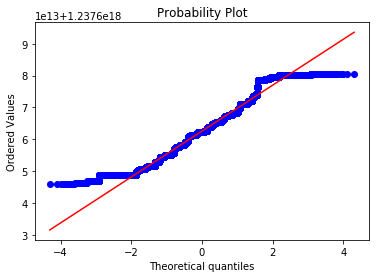

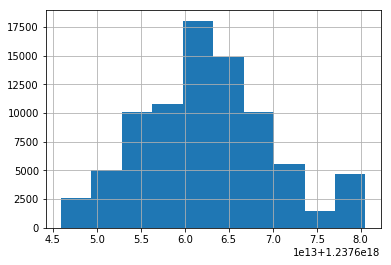

In [100]:
#Data Transformation
#Skewness
import scipy.stats as stats
#objid
stats.probplot(X_train["objid"], dist="norm", plot=plt);plt.show();
X_train["objid"].hist();

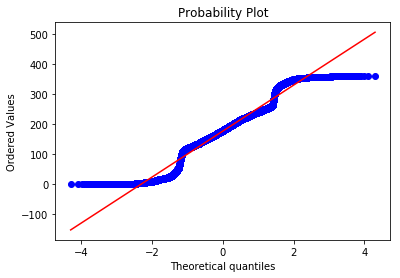

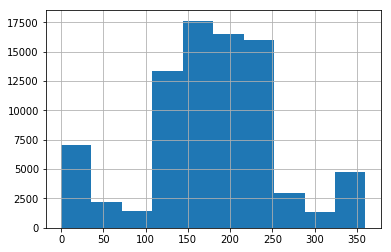

In [101]:
# J2000 Right Ascension (r-band)
stats.probplot(X_train["ra"], dist="norm", plot=plt);plt.show();
X_train["ra"].hist();

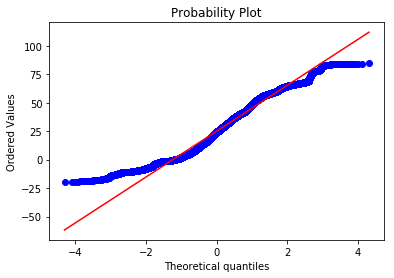

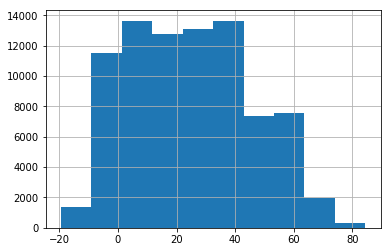

In [102]:
stats.probplot(X_train["dec"], dist="norm", plot=plt);plt.show();
X_train["dec"].hist();

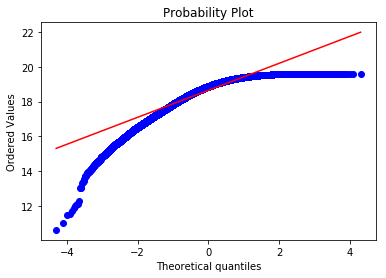

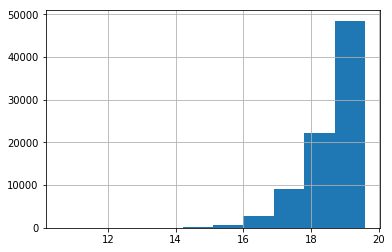

In [103]:
# better of deV/Exp magnitude fit (u-band)
#If you analyze the u-band column, you will notice a left-skewed distribution in there. So we need to apply Exponential transformation to make it symmetrical.
from sklearn.preprocessing import FunctionTransformer
stats.probplot(X_train["u"], dist="norm", plot=plt);plt.show()
X_train["u"].hist()


In [104]:
import math
columns=['u']
exp_transformer = FunctionTransformer(lambda x:x**3, validate=True)
# apply the transformation
data_new = exp_transformer.transform(X_train[columns])
df_new = pd.DataFrame(data_new, columns=columns)
# replace new values with previous data frame
X_train.u=df_new['u']


C:\Users\gnane\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


C:\Users\gnane\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\gnane\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\gnane\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


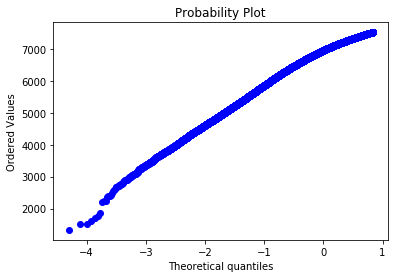

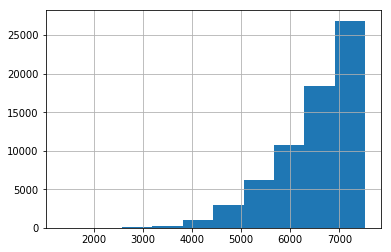

In [105]:
stats.probplot(X_train["u"], dist="norm", plot=plt);
plt.show();
X_train['u'].hist();

In [ ]:
stats.probplot(X_train["g"], dist="norm", plot=plt);plt.show();
X_train["g"].hist();

In [ ]:
stats.probplot(X_train["r"], dist="norm", plot=plt);plt.show();
X_train["r"].hist();

In [ ]:
stats.probplot(X_train["i"], dist="norm", plot=plt);plt.show();
X_train["i"].hist();

In [ ]:
stats.probplot(X_train["z"], dist="norm", plot=plt);plt.show();
X_train["z"].hist();

In [ ]:
stats.probplot(X_train["run"], dist="norm", plot=plt);plt.show();
X_train["run"].hist();

In [ ]:
stats.probplot(X_train["camcol"], dist="norm", plot=plt);plt.show();
X_train["camcol"].hist();

In [ ]:
stats.probplot(X_train["field"], dist="norm", plot=plt);plt.show();
X_train["field"].hist();

In [ ]:
stats.probplot(X_train["specobjid"], dist="norm", plot=plt);plt.show();
X_train["specobjid"].hist();

In [ ]:
stats.probplot(X_train["redshift"], dist="norm", plot=plt);plt.show();
X_train["redshift"].hist();

In [ ]:
stats.probplot(X_train["plate"], dist="norm", plot=plt);plt.show();
X_train["plate"].hist();

In [ ]:
stats.probplot(X_train["mjd"], dist="norm", plot=plt);plt.show();
X_train["mjd"].hist();

In [ ]:
stats.probplot(X_train["fiberid"], dist="norm", plot=plt);plt.show();
X_train["fiberid"].hist();

In [ ]:
X_train.skew()

In [ ]:
X_train.head()

In [ ]:

# One-hot encode the data using pandas get_dummies
features_df = pd.get_dummies(features_df)
# Display the first 5 rows of the last 12 columns
features_df.iloc[:,3:].head(3)

In [ ]:
data.head()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_df, target_df, test_size = 0.2, random_state = 101)
X_train

In [ ]:
target_df

In [ ]:
data['class'].nunique